# Importing

## Libraries

In [1]:
#Mounting to drive to import the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret c #Library to run TSForecastingExperiment and Auto ARIMA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 10.6 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import STL
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pycaret.time_series import TSForecastingExperiment

## Dataset

In [5]:
file_path = '/content/drive/MyDrive/Trails/NVDA 1.csv'
data = pd.read_csv(file_path) # importing the dataset from the file path
data.head()


Date     Open     High      Low    Close  Adj Close     Volume
0  2012-11-20  0.28950  0.29075  0.28425  0.28725   0.265173  336976000
1  2012-11-21  0.28725  0.29625  0.28700  0.29550   0.272789  422312000
2  2012-11-23  0.29675  0.30100  0.29525  0.29750   0.274636  276932000
3  2012-11-26  0.29800  0.30350  0.29750  0.30275   0.279482  364600000
4  2012-11-27  0.30150  0.30850  0.29900  0.30400   0.280636  451404000

In [6]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
2910  2024-06-14  129.960007  132.839996  128.320007  131.880005  131.880005   
2911  2024-06-17  132.990005  133.729996  129.580002  130.979996  130.979996   
2912  2024-06-18  131.139999  136.330002  130.690002  135.580002  135.580002   
2913  2024-06-20  139.800003  140.759995  129.520004  130.779999  130.779999   
2914  2024-06-21  127.120003  130.630005  124.300003  126.570000  126.570000   

         Volume  
2910  309320400  
2911  288504400  
2912  294335100  
2913  517768400  
2914  649445800

# About Data

In [7]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2915 non-null   object 
 1   Open       2915 non-null   float64
 2   High       2915 non-null   float64
 3   Low        2915 non-null   float64
 4   Close      2915 non-null   float64
 5   Adj Close  2915 non-null   float64
 6   Volume     2915 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.5+ KB


In [8]:
#summary statistics of all columns
data.describe()

Open         High          Low        Close    Adj Close  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean     12.203867    12.424575    11.971037    12.212220    12.184745   
std      19.324402    19.672322    18.933069    19.333715    19.338275   
min       0.287250     0.290750     0.284250     0.287250     0.265173   
25%       0.646500     0.657000     0.633500     0.647125     0.630227   
50%       4.743000     4.817500     4.659750     4.738500     4.698981   
75%      15.091000    15.345750    14.817875    15.112000    15.095000   
max     139.800003   140.759995   130.690002   135.580002   135.580002   

             Volume  
count  2.915000e+03  
mean   4.499863e+08  
std    2.473682e+08  
min    4.564400e+07  
25%    2.912780e+08  
50%    3.978650e+08  
75%    5.422780e+08  
max    3.692928e+09

In [9]:
#Checking if there are any missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Exploratory Data Analysis


In [10]:
# Creating subplots on all columns in dataset
fig = make_subplots(
    rows=6,
    cols=1,
    shared_xaxes=False,
    vertical_spacing=0.05,
    subplot_titles=('Open Price', 'High Price', 'Low Price', 'Close Price', 'Adjusted Close Price', 'Volume')  # Titles for each subplot
)
fig.add_trace(go.Scatter(x=data.index, y=data['Open'], name='Open'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['High'], name='High'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Low'], name='Low'), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close'), row=4, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], name='Adj Close'), row=5, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Volume'], name='Volume', mode='lines'), row=6, col=1)
fig.update_layout(
    height=1200, width=1000,
    title_text="NVIDIA Stock Attributes",
    showlegend=True
)
fig.update_annotations(font_size=12)
fig.show()


## Candle Stick Charts

In [211]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='NVIDIA Stock Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [213]:
data_graph = data
# Ensure the 'Date' column is datetime and set it as the index
data_graph['Date'] = pd.to_datetime(data_graph['Date'])
data_graph.set_index('Date', inplace=True)

# Ask the user for a specific year
year = int(input("Enter the year you want to analyze (e.g., 2020): "))

# Filter the data for the selected year
year_data = data_graph[data_graph.index.year == year]

# Create a daily candlestick chart for the selected year
fig_daily = go.Figure(data=[go.Candlestick(x=year_data.index,
                                           open=year_data['Open'],
                                           high=year_data['High'],
                                           low=year_data['Low'],
                                           close=year_data['Close'])])

fig_daily.update_layout(title=f'NVIDIA Stock Candlestick Chart for {year} (Daily)',
                        xaxis_title='Date',
                        yaxis_title='Price')

fig_daily.show()

# Resample data to monthly for the selected year
monthly_data = year_data.resample('M').agg({'Open': 'first',
                                            'High': 'max',
                                            'Low': 'min',
                                            'Close': 'last'})

# Create a monthly candlestick chart for the selected year
fig_monthly = go.Figure(data=[go.Candlestick(x=monthly_data.index,
                                             open=monthly_data['Open'],
                                             high=monthly_data['High'],
                                             low=monthly_data['Low'],
                                             close=monthly_data['Close'])])

fig_monthly.update_layout(title=f'NVIDIA Stock Candlestick Chart for {year} (Monthly)',
                          xaxis_title='Date',
                          yaxis_title='Price')

fig_monthly.show()

Enter the year you want to analyze (e.g., 2020): 2014


Slicing the data and selecting only the Date and Adj. Close Column

In [11]:
# Select only the 'Date' and 'Adj Close' columns
nvidia_data = data[['Date', 'Adj Close']].copy()

nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
nvidia_data.set_index('Date', inplace=True) #Making the Date Column as Index

print(nvidia_data.head())

            Adj Close
Date                 
2012-11-20   0.265173
2012-11-21   0.272789
2012-11-23   0.274636
2012-11-26   0.279482
2012-11-27   0.280636


In [12]:
nvidia_data.tail()

Adj Close
Date                  
2024-06-14  131.880005
2024-06-17  130.979996
2024-06-18  135.580002
2024-06-20  130.779999
2024-06-21  126.570000

In [199]:
# Creating an interactive plot using Plotly
fig = px.line(nvidia_data, x=nvidia_data.index, y='Adj Close', title='NVIDIA Stock Price')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Adj Close Price',
    legend_title_text='Stock Price',
    template='ggplot2'
)
fig.show()

The plot shows a clear upward trend in NVIDIA's stock price over the period.
The stock price remained relatively low and stable until around 2016.
After 2016, there is a noticeable increase in stock price, especially pronounced from 2020 onwards. The stock price experienced fluctuations and volatility, particularly visible after 2020. Sharp rises and falls are observed, indicating periods of high volatility.The most significant increase in stock price appears to have occurred in the last couple of years, with a steep rise observed around 2023-2024.

## Volume

In [200]:
Volume_data = data[['Date', 'Volume']].copy()
# Create an interactive plot using Plotly
fig = px.line(Volume_data, x='Date', y='Volume', title='NVidia Volume')

# Show the plot
fig.show()

In [16]:
res = adfuller(Volume_data.Volume)
if res[1] < 0.05:
  print('The data of {} is stationary series'.format(Volume_data.Volume.name))
else:
  print('The data of {} is not stationary series'.format(Volume_data.Volume.name))

The data of Volume is stationary series


In [203]:
Volume_data['Date'] = pd.to_datetime(data.Date)
Volume_data = Volume_data.set_index('Date')
Volume_data['year'] = Volume_data.index.year
Volume_data['month'] = Volume_data.index.month
Volume_data['day'] = Volume_data.index.day

In [207]:
# Create a facet grid plot using Plotly
fig = px.line(Volume_data, x='month', y='Volume', facet_col='year', facet_col_wrap=4, title='NVidia Volume by Month and Year')

# Show the plot
fig.show()

In [210]:
Volume_data['quarter'] = Volume_data.index.quarter

# Aggregate the data by quarters
quarterly_data = Volume_data.groupby(['year', 'quarter']).sum().reset_index()

# Create an interactive grouped bar plot using Plotly
fig = px.bar(quarterly_data, x='quarter', y='Volume', color='year', barmode='group', title='NVidia Volume by Quarter and Year')

# Show the plot
fig.show()

## Returns

In [20]:
# Calculating daily returns
nvidia_data['Returns'] = nvidia_data['Adj Close'].pct_change()

dates = nvidia_data.index
returns = nvidia_data['Returns']

fig = go.Figure()

fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0.3, y1=0,
              line=dict(color="rgba(51, 204, 51, 0.3)"))
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0, y1=-0.2,
              line=dict(color="rgba(204, 51, 51, 0.3)"))

fig.add_trace(go.Scatter(x=dates[1:], y=returns[1:], mode='lines', name='Daily Returns'))

fig.update_layout(
    title="Nvidia Stock Daily Returns",
    xaxis_title="Date",
    yaxis_title="Returns",
    font=dict(size=20),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
    width=1800,
    height=600
)

fig.show()


In [21]:
# Calculating possible metrics on Returns
mean_return = nvidia_data['Returns'].mean()
volatility = nvidia_data['Returns'].std()
skewness = nvidia_data['Returns'].skew()
kurtosis = nvidia_data['Returns'].kurtosis()
risk_free_rate = 0.01 / 252
sharpe_ratio = (mean_return - risk_free_rate) / volatility
rolling_max = nvidia_data['Adj Close'].cummax()
daily_drawdown = nvidia_data['Adj Close'] / rolling_max - 1.0
max_drawdown = daily_drawdown.cummin().min()
confidence_level = 0.05
VaR = np.percentile(nvidia_data['Returns'].dropna(), confidence_level*100)
CVaR = nvidia_data['Returns'][nvidia_data['Returns'] <= VaR].mean()

print(f"Mean Return: {mean_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.4f}")
print(f"Value at Risk (VaR) at 5% confidence level: {VaR:.4f}")
print(f"Conditional Value at Risk (CVaR) at 5% confidence level: {CVaR:.4f}")

Mean Return: 0.0025
Volatility: 0.0283
Skewness: 0.7198
Kurtosis: 10.1977
Sharpe Ratio: 0.0875
Max Drawdown: -0.6634
Value at Risk (VaR) at 5% confidence level: -0.0405
Conditional Value at Risk (CVaR) at 5% confidence level: -0.0603


# Decomposition

In [22]:
# Set the period for STL decomposition
period = 252  # For yearly seasonality in daily stock data

stl = STL(nvidia_data['Adj Close'], period=period)
result = stl.fit()

# Extracting the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
season_adjust = trend + residual

# Creating a DataFrame to hold the components and other relevant columns
components_df = pd.DataFrame({
    'Date': nvidia_data.index,
    'Adj Close': nvidia_data['Adj Close'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual,
    'Seasonally Adjusted': season_adjust
})

components_df['Model'] = 'STL'

# Storing All the columns
components_df = components_df[['Model', 'Date', 'Adj Close', 'Trend', 'Seasonal', 'Residual', 'Seasonally Adjusted']]


In [23]:
components_df

Model       Date   Adj Close      Trend   Seasonal   Residual  \
Date                                                                       
2012-11-20   STL 2012-11-20    0.265173   0.254753  -0.027693   0.038113   
2012-11-21   STL 2012-11-21    0.272789   0.255243  -0.020859   0.038404   
2012-11-23   STL 2012-11-23    0.274636   0.255734  -0.023072   0.041974   
2012-11-26   STL 2012-11-26    0.279482   0.256224  -0.013936   0.037194   
2012-11-27   STL 2012-11-27    0.280636   0.256715  -0.006761   0.030682   
...          ...        ...         ...        ...        ...        ...   
2024-06-14   STL 2024-06-14  131.880005  91.438932  28.992735  11.448338   
2024-06-17   STL 2024-06-17  130.979996  91.672006  28.109307  11.198684   
2024-06-18   STL 2024-06-18  135.580002  91.905174  30.926024  12.748805   
2024-06-20   STL 2024-06-20  130.779999  92.138435  27.954535  10.687028   
2024-06-21   STL 2024-06-21  126.570000  92.371790  24.855291   9.342919   

            Seasonally Adjusted  
Date                             
2012-11-20             0.292866  
2012-11-21             0.293648  
2012-11-23             0.297708  
2012-11-26             0.293418  
2012-11-27             0.287397  
...                         ...  
2024-06-14           102.887270  
2024-06-17           102.870689  
2024-06-18           104.653978  
2024-06-20           102.825464  
2024-06-21           101.714709  

[2915 rows x 7 columns]

In [24]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02,  # Space between the plots
                    subplot_titles=('Trend', 'Seasonality', 'Residuals'))

fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=trend, name='Trend'),
    row=1, col=1
)

# Seasonality subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=seasonal, name='Seasonality'),
    row=2, col=1
)

# Residuals subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=residual, name='Residuals'),
    row=3, col=1
)

fig.update_layout(height=800, width=1000,
                  title_text="Decomposition of NVIDIA Stock Data",
                  showlegend=False)
fig.show()

In [25]:
# Handling the missing values
nvidia_data = nvidia_data.interpolate()

def plot_rolling_statistics(series, window=12):
    # Calculate rolling mean and standard deviation
    rolmean = series.rolling(window=window).mean()
    rolstd = series.rolling(window=window).std()

    # Create a Plotly graph object
    fig = go.Figure()

    # Add the original series to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=series,
        mode='lines',
        name='Original',
        line=dict(color='blue')
    ))

    # Add the rolling mean to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolmean,
        mode='lines',
        name='Rolling Mean',
        line=dict(color='red')
    ))

    # Add the rolling standard deviation to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolstd,
        mode='lines',
        name='Rolling Std',
        line=dict(color='black')
    ))

    # Update plot layout
    fig.update_layout(
        title='Rolling Mean & Standard Deviation',
        xaxis_title='Date',
        yaxis_title='Value',
        width=800,  # Adjust width
        height=400   # Adjust height
    )

    # Show the figure
    fig.show()


# Original Series
plot_rolling_statistics(nvidia_data['Adj Close'])

# Stationarity Tests

ADF Test: If the p-value is below a significance level (e.g., 0.05), you can reject the null hypothesis that the series has a unit root (non-stationary).

In [190]:
#Creating a function to apply ADF Test
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

print("ADF Test on Original Series:")
adf_test(nvidia_data['Adj Close'])

ADF Test on Original Series:
ADF Statistic: 5.872962520786018
p-value: 1.0
Critical Value (1%): -3.432617102137327
Critical Value (5%): -2.8625416527115592
Critical Value (10%): -2.567303208514837


KPSS Test: If the p-value is below a significance level (e.g., 0.05), you reject the null hypothesis that the series is stationary.

In [191]:
#Creating a Function to apply KPSS Test
def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value}')

print("KPSS Test on Original Series:")
kpss_test(nvidia_data['Adj Close'])

KPSS Test on Original Series:
KPSS Statistic: 5.136646551283202
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


# Transformation

In [27]:
# Log Transformation
nvidia_data['log_Close'] = np.log(nvidia_data['Adj Close'])
plot_rolling_statistics(nvidia_data['log_Close'])

In [28]:
# ADF of Log Transformed data
print("ADF Test on Log Transformed Series:")
adf_test(nvidia_data['log_Close'])

ADF Test on Log Transformed Series:
ADF Statistic: 0.5932017973202582
p-value: 0.9874468610192699
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


Given that our data shows both a strong trend and increasing variance, it would be beneficial to apply both log transformation and differencing. This combined approach will help us stabilize the variance and remove the trend, making the series more stationary.

In [29]:
# Applying differencing on the log transformed data
nvidia_data['log_diff_Close'] = nvidia_data['log_Close'].diff().dropna()
plot_rolling_statistics(nvidia_data['log_diff_Close'])

Trend Removal: The rolling mean is stable around zero, indicating the trend has been successfully removed.

Variance Stabilization: The rolling standard deviation is stable, indicating that the variance is now more consistent over time.

These observations suggest that the log-differencing transformation has successfully made the series stationary.

In [30]:
# Checking and removing any infinite values which can result from improper data handling
nvidia_data['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data['log_diff_Close'].dropna(inplace=True) #Drpping NAN values

In [31]:
# Applying ADF on Log Differenced data to cross verify stationarity
print("ADF Test on Log Differenced Series:")
adf_test(nvidia_data['log_diff_Close'])

ADF Test on Log Differenced Series:
ADF Statistic: -19.0951709457048
p-value: 0.0
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


In [32]:
nvidia_data

Adj Close   Returns  log_Close  log_diff_Close
Date                                                       
2012-11-20    0.265173       NaN  -1.327373             NaN
2012-11-21    0.272789  0.028721  -1.299057        0.028316
2012-11-23    0.274636  0.006771  -1.292309        0.006748
2012-11-26    0.279482  0.017645  -1.274817        0.017491
2012-11-27    0.280636  0.004129  -1.270697        0.004121
...                ...       ...        ...             ...
2024-06-14  131.880005  0.017514   4.881892        0.017363
2024-06-17  130.979996 -0.006824   4.875045       -0.006848
2024-06-18  135.580002  0.035120   4.909562        0.034517
2024-06-20  130.779999 -0.035403   4.873517       -0.036045
2024-06-21  126.570000 -0.032191   4.840796       -0.032721

[2915 rows x 4 columns]

# Auto ARIMA

Using Auto Arima to get the best Parameters

In [120]:
nvidia_data

Adj Close   Returns  log_Close  log_diff_Close
Date                                                       
2012-11-20    0.265173       NaN  -1.327373             NaN
2012-11-21    0.272789  0.028721  -1.299057        0.028316
2012-11-23    0.274636  0.006771  -1.292309        0.006748
2012-11-26    0.279482  0.017645  -1.274817        0.017491
2012-11-27    0.280636  0.004129  -1.270697        0.004121
...                ...       ...        ...             ...
2024-06-14  131.880005  0.017514   4.881892        0.017363
2024-06-17  130.979996 -0.006824   4.875045       -0.006848
2024-06-18  135.580002  0.035120   4.909562        0.034517
2024-06-20  130.779999 -0.035403   4.873517       -0.036045
2024-06-21  126.570000 -0.032191   4.840796       -0.032721

[2915 rows x 4 columns]

In [121]:
test_arima = auto_arima(nvidia_data['log_diff_Close'].dropna())
print(test_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2914
Model:               SARIMAX(1, 0, 0)   Log Likelihood                6287.799
Date:                Sat, 29 Jun 2024   AIC                         -12569.598
Time:                        07:03:28   BIC                         -12551.666
Sample:                             0   HQIC                        -12563.138
                               - 2914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.001      4.300      0.000       0.001       0.003
ar.L1         -0.0602      0.012     -4.934      0.000      -0.084      -0.036
sigma2         0.0008   9.18e-06     85.194      0.0

In [122]:
test_arima = auto_arima(nvidia_data['log_diff_Close'].dropna(),
                        start_p=0, start_q=0,  # Initial guess for the ARIMA order
                        max_p=5, max_q=5,  # Maximum p and q
                        seasonal=False,  # No seasonality for this example
                        trace=True,  # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Stepwise search to find the best model

# Display the summary of the model
print(test_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12546.427, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12552.998, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12552.616, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12552.271, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12551.827, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12550.792, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12569.598, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12561.012, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12568.218, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12568.098, Time=1.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12569.254, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12566.242, Time=1.24 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.029 seconds
                               SARIMAX Results                  

## Fitting the Model

In [161]:
fit_data = pd.DataFrame(nvidia_data['log_diff_Close'])
fit_data

log_diff_Close
Date                      
2012-11-20             NaN
2012-11-21        0.028316
2012-11-23        0.006748
2012-11-26        0.017491
2012-11-27        0.004121
...                    ...
2024-06-14        0.017363
2024-06-17       -0.006848
2024-06-18        0.034517
2024-06-20       -0.036045
2024-06-21       -0.032721

[2915 rows x 1 columns]

In [162]:
# Defining the number of data points to use for training
n_train = len(fit_data) - 100  # Use all data except the last 60 for training as We selected 60 in TSForecasting Experiment

# Split the data into training and testing sets
train = fit_data.iloc[:n_train]
test = fit_data.iloc[n_train:]  # to ensures the last 100 points are used for testing

print(f"Training data range: {train.index.min()} to {train.index.max()}")
print(f"Testing data range: {test.index.min()} to {test.index.max()}")

Training data range: 2012-11-20 00:00:00 to 2024-01-29 00:00:00
Testing data range: 2024-01-30 00:00:00 to 2024-06-21 00:00:00


In [163]:
train.shape

(2815, 1)

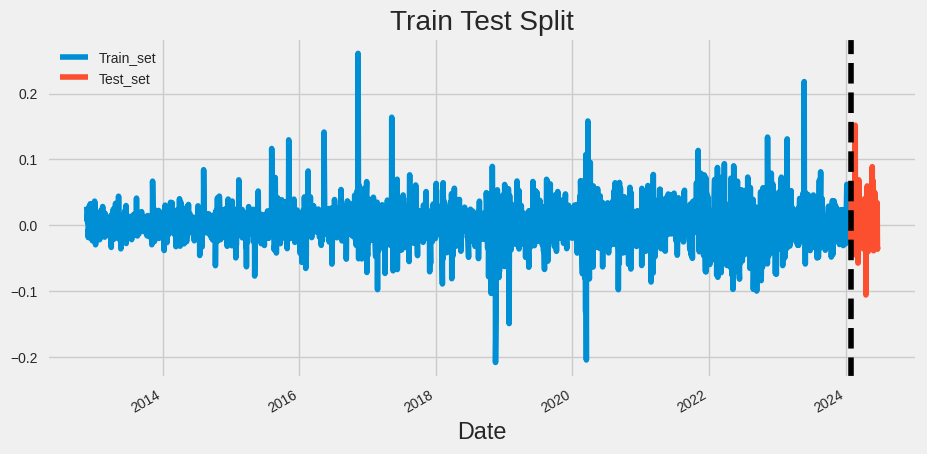

In [175]:
fig, ax = plt.subplots(figsize=(10, 5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline('2024-01-29', color ='Black', ls='--') # based on the date of split
plt.legend(['Train_set', 'Test_set'])
plt.title('Train Test Split')
plt.show()

In [165]:
from statsmodels.tsa.arima.model import ARIMA

In [177]:
model = ARIMA(train['log_diff_Close'], order=(1, 0, 0))
fitted_model = model.fit()

# Printing out the summary of the model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:         log_diff_Close   No. Observations:                 2815
Model:                 ARIMA(1, 0, 0)   Log Likelihood                6095.121
Date:                Sat, 29 Jun 2024   AIC                         -12184.241
Time:                        07:16:18   BIC                         -12166.413
Sample:                             0   HQIC                        -12177.808
                               - 2815                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.000      3.915      0.000       0.001       0.003
ar.L1         -0.0626      0.012     -5.159      0.000      -0.086      -0.039
sigma2         0.0008   9.04e-06     85.114      0.0

In [178]:
start = len(train)
end = len(train) + len(test) - 1
forecast = fitted_model.predict(start=start, end=end)
forecast.index = nvidia_data.index[start:end+1]

In [179]:
print(forecast.min(), forecast.max())

0.000607637137951579 0.0020237005563930183


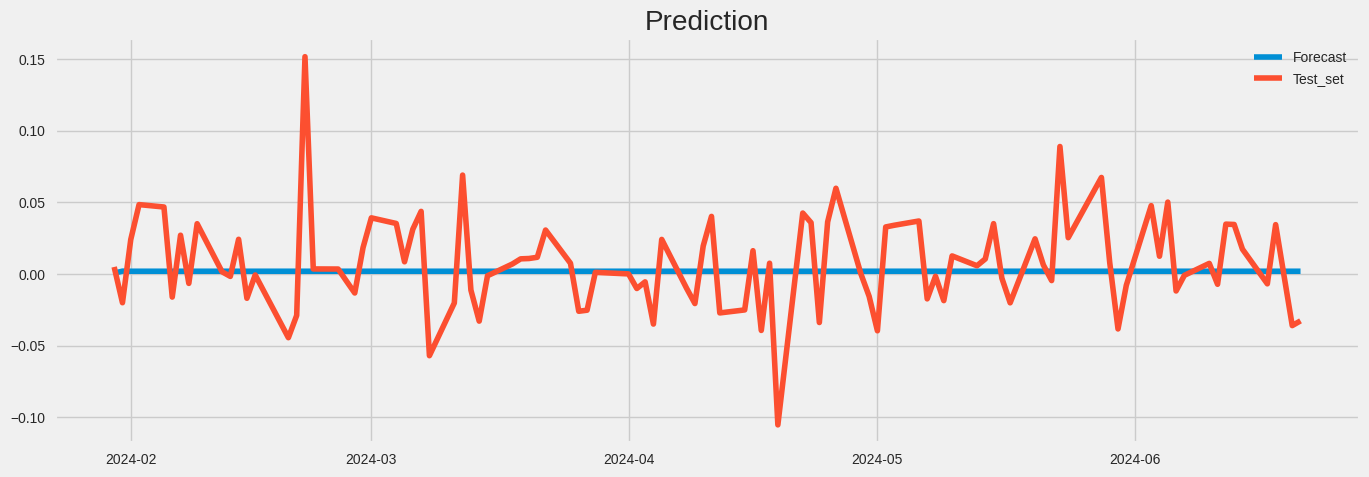

In [180]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(forecast)
plt.plot(test)
plt.legend(['Forecast', 'Test_set'])
plt.title('Prediction')
plt.show()

In [181]:
print(forecast)

Date
2024-01-30    0.000608
2024-01-31    0.002024
2024-02-01    0.001935
2024-02-02    0.001941
2024-02-05    0.001940
                ...   
2024-06-14    0.001940
2024-06-17    0.001940
2024-06-18    0.001940
2024-06-20    0.001940
2024-06-21    0.001940
Name: predicted_mean, Length: 100, dtype: float64


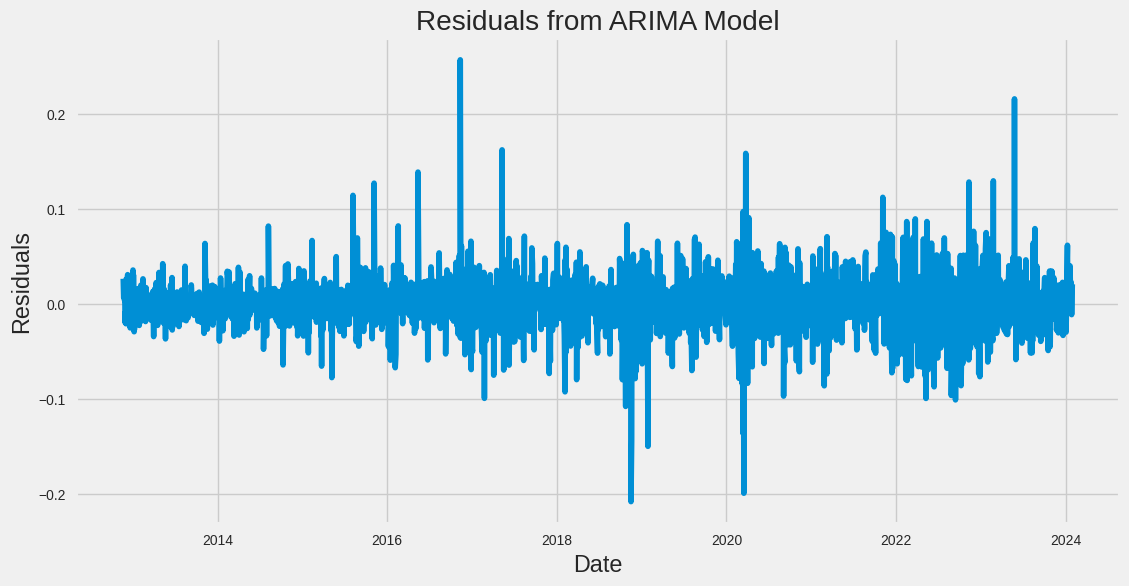

In [172]:
# Extract the residuals
residuals = fitted_model.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

<Figure size 1200x600 with 0 Axes>

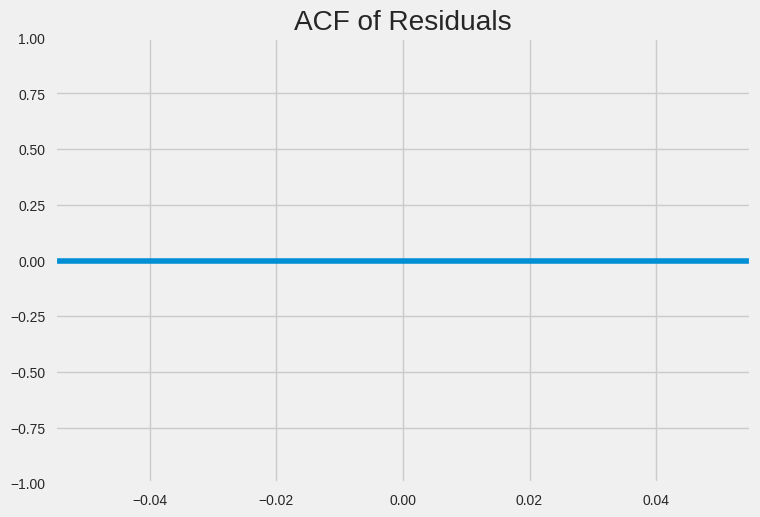

<Figure size 1200x600 with 0 Axes>

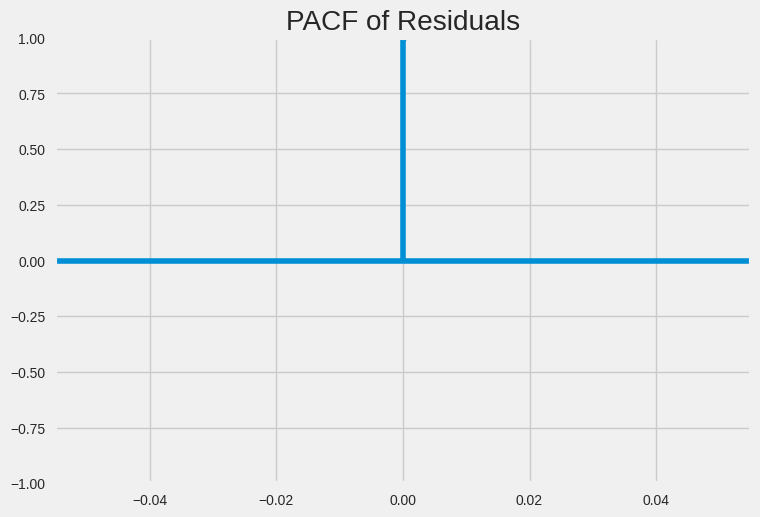

In [173]:
# Plot the ACF of the residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=50)
plt.title('ACF of Residuals')
plt.show()

# Plot the PACF of the residuals
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=50)
plt.title('PACF of Residuals')
plt.show()

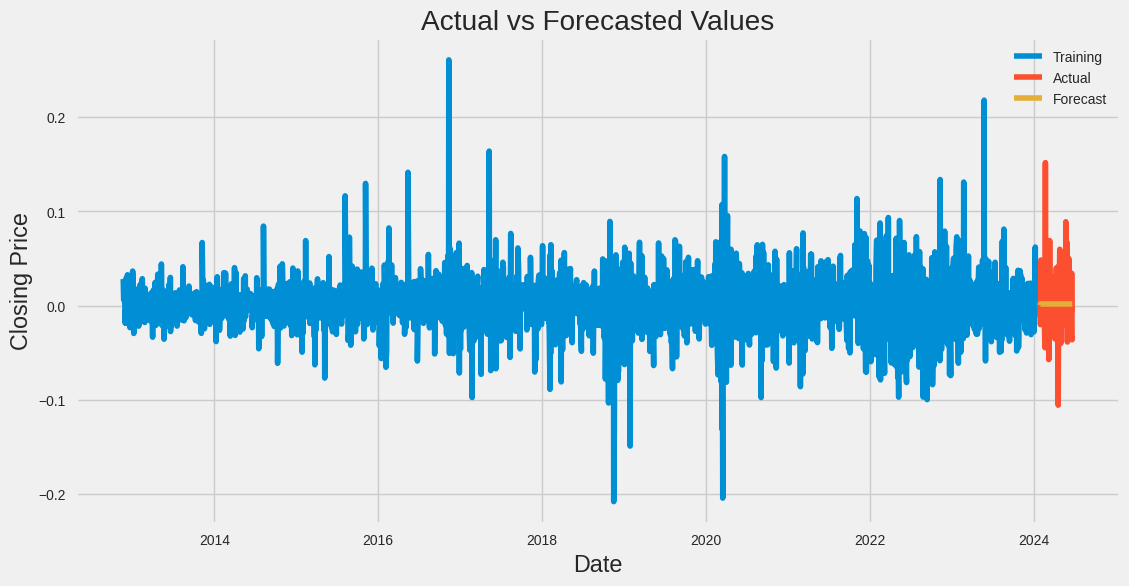

In [182]:
# Extract the actual values for the same period
actual_values = nvidia_data['log_diff_Close'][n_train:]

# Plotting the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(nvidia_data.index[:n_train], nvidia_data['log_diff_Close'][:n_train], label='Training')
plt.plot(nvidia_data.index[n_train:], actual_values, label='Actual')
plt.plot(nvidia_data.index[n_train:], forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.title('Actual vs Forecasted Values')
plt.show()

# TSForecastingExperiment

In [89]:
from pycaret.time_series import TSForecastingExperiment

the NVIDIDA stock data we have considered certain dates of non-trading days are not available, and PyCaret doesn't support modeling for daily data with missing values, it is suggested to generate a synthetic sequence of new date column starting from the first start date. [Pycaret Working Example](https://developers.lseg.com/en/article-catalog/article/modelling-and-evaluation-using-pycaret-on-time-series-data)

In [90]:
# Load your NVIDIA stock data
nvidia_data_exp = data

# Verify index and columns
print(nvidia_data_exp.index)  # This should print the DateTime index

RangeIndex(start=0, stop=2915, step=1)


In [91]:
nvidia_data_exp = nvidia_data_exp[['Date','Adj Close']]

In [92]:
nvidia_data_exp

Date   Adj Close
0     2012-11-20    0.265173
1     2012-11-21    0.272789
2     2012-11-23    0.274636
3     2012-11-26    0.279482
4     2012-11-27    0.280636
...          ...         ...
2910  2024-06-14  131.880005
2911  2024-06-17  130.979996
2912  2024-06-18  135.580002
2913  2024-06-20  130.779999
2914  2024-06-21  126.570000

[2915 rows x 2 columns]

In [93]:
from datetime import date, timedelta

sdate = [int(i) for i in nvidia_data_exp.Date.min().split("-")] # start date

sdate = date(sdate[0], sdate[1], sdate[2])

edate = [int(i) for i in nvidia_data_exp.Date.max().split("-")] # end date

edate = date(edate[0], edate[1], edate[2])

In [94]:
nvidia_data_exp['Index_Date'] = pd.date_range(sdate,edate-timedelta(days=1),freq='d')[:nvidia_data_exp.shape[0]]

nvidia_data_exp.index = pd.PeriodIndex(nvidia_data_exp.Index_Date, freq='D')

nvidia_data_exp = nvidia_data_exp.drop("Index_Date", axis=1)

nvidia_data_exp['Adj Close'] = nvidia_data_exp['Adj Close'].astype(float)

nvidia_data_exp.sort_index(ascending=True, inplace=True)

In [95]:
nvidia_data_exp.head()

Date  Adj Close
Index_Date                       
2012-11-20  2012-11-20   0.265173
2012-11-21  2012-11-21   0.272789
2012-11-22  2012-11-23   0.274636
2012-11-23  2012-11-26   0.279482
2012-11-24  2012-11-27   0.280636

In [96]:
forecast_horizon = 100
# Setup experiment on original data
exp = TSForecastingExperiment()
exp.setup(data=nvidia_data_exp['Adj Close'], session_id=171, fh=forecast_horizon)

# Plot diagnostics
exp.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [ ]:
#ACF, and PACF for the original data
exp.plot_model(plot="acf")
exp.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

In [97]:
exp.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting          Value  
0                                    2915.0  
1                                       0.0  
2                                 12.184745  
3                                  4.698981  
4                                 19.338275  
5                                 373.96889  
6                                  10.32273  
7                                   2.95705  
8                                    2767.0  
9   {'alpha': 0.05, 'K': 24}    59214.83499  
10  {'alpha': 0.05, 'K': 48}  105236.912091  
11  {'alpha': 0.05, 'K': 24}            0.0  
12  {'alpha': 0.05, 'K': 48}            0.0  
13  {'alpha': 0.05, 'K': 24}            0.0  
14  {'alpha': 0.05, 'K': 48}            0.0  
15           {'alpha': 0.05}          False  
16           {'alpha': 0.05}            1.0  
17           {'alpha': 0.05}       5.872963  
18           {'alpha': 0.05}      -3.432617  
19           {'alpha': 0.05}      -2.862542  
20           {'alpha': 0.05}      -2.567303  
21           {'alpha': 0.05}          False  
22           {'alpha': 0.05}           0.01  
23           {'alpha': 0.05}       1.099928  
24           {'alpha': 0.05}          0.119  
25           {'alpha': 0.05}          0.146  
26           {'alpha': 0.05}          0.176  
27           {'alpha': 0.05}          0.216  
28           {'alpha': 0.05}          False  
29           {'alpha': 0.05}            0.0

In [98]:
# Log Transformation
nvidia_data_exp['log_Close'] = np.log(nvidia_data_exp['Adj Close'])

# Log Differencing
nvidia_data_exp['log_diff_Close'] = nvidia_data_exp['log_Close'].diff().dropna()

nvidia_data_exp['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data_exp['log_diff_Close'].dropna(inplace=True)

In [99]:
forecast_horizon = 100
# Setup experiment on transformed data
exp_diff = TSForecastingExperiment()
exp_diff.setup(data=nvidia_data_exp['log_diff_Close'].dropna(), session_id=171, fh=forecast_horizon)

In [197]:
# Plot diagnostics, ACF, and PACF for the transformed data
exp_diff.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [ ]:
exp_diff.plot_model(plot="acf")
exp_diff.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

In [101]:
exp_diff.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting       Value  
0                                 2914.0  
1                                    0.0  
2                               0.002117  
3                               0.002105  
4                               0.028023  
5                               0.000785  
6                               8.428835  
7                               0.266275  
8                                 2897.0  
9   {'alpha': 0.05, 'K': 24}   68.688204  
10  {'alpha': 0.05, 'K': 48}  100.013113  
11  {'alpha': 0.05, 'K': 24}    0.000003  
12  {'alpha': 0.05, 'K': 48}    0.000016  
13  {'alpha': 0.05, 'K': 24}         0.0  
14  {'alpha': 0.05, 'K': 48}         0.0  
15           {'alpha': 0.05}        True  
16           {'alpha': 0.05}         0.0  
17           {'alpha': 0.05}  -19.095171  
18           {'alpha': 0.05}   -3.432602  
19           {'alpha': 0.05}   -2.862535  
20           {'alpha': 0.05}     -2.5673  
21           {'alpha': 0.05}        True  
22           {'alpha': 0.05}         0.1  
23           {'alpha': 0.05}    0.091304  
24           {'alpha': 0.05}       0.119  
25           {'alpha': 0.05}       0.146  
26           {'alpha': 0.05}       0.176  
27           {'alpha': 0.05}       0.216  
28           {'alpha': 0.05}       False  
29           {'alpha': 0.05}         0.0

## Model comparision

Pycaret also allows us to compare different models on time series data. We can either explicitly give a list of models to compare or use the comparemodels() function that runs model trianing on all possible models. [Pycaret Functional API](https://pycaret.gitbook.io/docs#time-series)

In [102]:
models_to_compare = ['arima', 'ets','exp_smooth','auto_arima', ]

# Compare selected models
best_model = exp_diff.compare_models(include=models_to_compare)

Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [194]:
exp_diff.get_metrics()

Name Display Name                                    Score Function  \
ID                                                                            
mase    MASE         MASE                 <function mase at 0x7ba534757eb0>   
rmsse  RMSSE        RMSSE                <function rmsse at 0x7ba534757f40>   
mae      MAE          MAE  <function mean_absolute_error at 0x7ba536e515a0>   
rmse    RMSE         RMSE   <function mean_squared_error at 0x7ba536e51900>   
mape    MAPE         MAPE                 <function mape at 0x7ba534757e20>   
smape  SMAPE        SMAPE          <function _smape_loss at 0x7ba53486a4d0>   
r2        R2           R2             <function r2_score at 0x7ba536e52050>   

                                                  Scorer Target  \
ID                                                                
mase   make_scorer(mase, greater_is_better=False, res...   pred   
rmsse  make_scorer(rmsse, greater_is_better=False, re...   pred   
mae                              neg_mean_absolute_error   pred   
rmse                         neg_root_mean_squared_error   pred   
mape   make_scorer(mape, greater_is_better=False, res...   pred   
smape  make_scorer(_smape_loss, greater_is_better=Fal...   pred   
r2                                                    r2   pred   

                     Args  Greater is Better  Custom  
ID                                                    
mase                   {}              False   False  
rmsse                  {}              False   False  
mae                    {}              False   False  
rmse   {'squared': False}              False   False  
mape                   {}              False   False  
smape                  {}              False   False  
r2                     {}               True   False

**auto_arima** has the lowest values for MASE (0.8045), RMSSE (0.7730), MAE (0.0215), and RMSE (0.0292), indicating it has the best overall performance among the compared models.

Lets train an Auto ARIMA model on our data using the previously setup of exp_diff and create_model function provided by Pycaret.

In [184]:
a_arima = exp_diff.create_model('auto_arima')

a_arima

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AutoARIMA(random_state=171, sp=7, suppress_warnings=True)

As PyCaret also provides us the oppurtunity to Auto tune, we are going to use auto tune capabilities to the above trained model to improve its performance. If there is a possibility of improvement, the model will be tune its hyperparameters otherwise it will retain it's initial state

[PyCaret Documentation](https://pycaret.readthedocs.io/en/latest/api/time_series.html#pycaret.time_series.tune_model)



In [185]:
tuned_arima = exp_diff.tune_model(a_arima)

tuned_arima

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.2min finished


AutoARIMA(random_state=171, sp=7, suppress_warnings=True)

In [186]:
exp_diff.plot_model(tuned_arima, plot = 'forecast')

In [198]:
exp_diff.plot_model(tuned_arima, plot = 'residuals')

In [189]:
exp_diff.predict_model(tuned_arima)

y_pred
2020-08-05  0.0040
2020-08-06  0.0027
2020-08-07  0.0010
2020-08-08  0.0032
2020-08-09  0.0030
...            ...
2020-11-08  0.0019
2020-11-09  0.0019
2020-11-10  0.0020
2020-11-11  0.0019
2020-11-12  0.0019

[100 rows x 1 columns]